# Практическая работа 3. Программные средства консолидации данных

## Цель работы
Освоить практические навыки консолидации данных из различных источников с использованием Python и библиотеки pandas.

## Задачи
1. Загрузить данные из различных источников (CSV, Excel, JSON).
2. Провести предварительную обработку и очистку данных.
3. Объединить данные из разных источников.
4. Выполнить агрегацию и трансформацию данных.
5. Сохранить консолидированные данные в новый файл.

## Необходимое программное обеспечение
- Python 3.x
- Библиотеки: pandas, numpy, matplotlib

## Исходные данные
- `sales_2022.csv`: данные о продажах за 2022 год
- `sales_2023.xlsx`: данные о продажах за 2023 год
- `products.json`: информация о продуктах


## Ход работы

Процесс создания тестовых данных для файлов
- `sales_2022.csv`
- `sales_2023.xlsx`
- `products.json`


In [1]:
import pandas as pd
import numpy as np
import json
from datetime import datetime, timedelta
import random


In [2]:
# Функция для генерации случайной даты
def random_date(start, end):
    return start + timedelta(
        seconds=random.randint(0, int((end - start).total_seconds()))
    )

1. Создание products.json:
   - Мы определяем список категорий продуктов.
   - Генерируем 100 уникальных продуктов с полями: product_id, name, category и price.
   - Каждому продукту присваивается случайная категория и цена.
   - Данные сохраняются в формате JSON с отступами для удобства чтения.


In [3]:
# Генерация данных о продуктах
product_categories = ['Электроника', 'Одежда', 'Книги', 'Продукты питания', 'Мебель']
products = []

for i in range(100):  # Генерируем 100 продуктов
    product = {
        'product_id': f'P{i:03d}',
        'name': f'Продукт {i}',
        'category': random.choice(product_categories),
        'price': round(random.uniform(10, 1000), 2)
    }
    products.append(product)

# Сохранение данных о продуктах в JSON
with open('products.json', 'w', encoding='utf-8') as f:
    json.dump(products, f, ensure_ascii=False, indent=4)

print("Файл products.json создан")



Файл products.json создан


2. Создание sales_2022.csv:
   - Определяем период продаж с 1 января по 31 декабря 2022 года.
   - Генерируем 10000 записей о продажах.
   - Для каждой продажи случайным образом выбирается продукт из списка products.
   - Генерируется случайная дата продажи в пределах 2022 года.
   - Количество проданных единиц выбирается случайно от 1 до 10.
   - Сумма продажи рассчитывается как произведение цены продукта на количество.
   - Данные сохраняются в CSV формате.


In [4]:
# Генерация данных о продажах за 2022 год
sales_2022 = []
start_date = datetime(2022, 1, 1)
end_date = datetime(2022, 12, 31)

for _ in range(10000):  # Генерируем 10000 записей о продажах
    product = random.choice(products)
    sale = {
        'date': random_date(start_date, end_date).strftime('%Y-%m-%d'),
        'product_id': product['product_id'],
        'quantity': random.randint(1, 10),
        'sales': round(product['price'] * random.randint(1, 10), 2)
    }
    sales_2022.append(sale)

df_2022 = pd.DataFrame(sales_2022)
df_2022.to_csv('sales_2022.csv', index=False)
print("Файл sales_2022.csv создан")


Файл sales_2022.csv создан


3. Создание sales_2023.xlsx:
   - Процесс аналогичен созданию файла за 2022 год, но с некоторыми отличиями:
   - Период продаж ограничен с 1 января по 30 сентября 2023 года (предполагая, что данные неполные).
   - Генерируется большее количество записей (12000) для имитации роста продаж.
   - Максимальное количество проданных единиц увеличено до 15 для создания вариативности.
   - Данные сохраняются в формате Excel (xlsx).


In [5]:
# Генерация данных о продажах за 2023 год
sales_2023 = []
start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 9, 30)  # Предположим, что данные есть только до сентября 2023

for _ in range(12000):  # Генерируем 12000 записей о продажах (больше, чем в 2022)
    product = random.choice(products)
    sale = {
        'date': random_date(start_date, end_date).strftime('%Y-%m-%d'),
        'product_id': product['product_id'],
        'quantity': random.randint(1, 15),  # Увеличим максимальное количество
        'sales': round(product['price'] * random.randint(1, 15), 2)
    }
    sales_2023.append(sale)

df_2023 = pd.DataFrame(sales_2023)
df_2023.to_excel('sales_2023.xlsx', index=False)
print("Файл sales_2023.xlsx создан")


Файл sales_2023.xlsx создан


Особенности сгенерированных данных:
- Все файлы связаны между собой через поле product_id.
- Данные имеют реалистичную структуру и вариативность.
- В данных присутствуют различные типы полей: строковые (категории, ID), числовые (цены, количество), даты.

### Шаг 1: Подготовка рабочей среды

1. Создайте новый Python-скрипт `data_consolidation.py`.
2. Импортируйте необходимые библиотеки:



In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Шаг 2: Загрузка данных
1. Загрузите данные из CSV-файла:

In [8]:
df_2022 = pd.read_csv('sales_2022.csv')
print("Данные за 2022 год:")
print(df_2022.head())

Данные за 2022 год:
         date product_id  quantity    sales
0  2022-06-09       P049        10   838.08
1  2022-06-26       P021         8  3060.90
2  2022-01-25       P031         1    97.74
3  2022-08-31       P063         1  2344.58
4  2022-01-26       P095         7  1318.60


2. Загрузите данные из Excel-файла:

In [9]:
df_2023 = pd.read_excel('sales_2023.xlsx')
print("\nДанные за 2023 год:")
print(df_2023.head())


Данные за 2023 год:
         date product_id  quantity    sales
0  2023-01-20       P065         8  7178.52
1  2023-02-26       P045        13  2895.95
2  2023-02-11       P065        10  2991.05
3  2023-06-03       P062         2   697.05
4  2023-01-20       P014         8   107.76


3. Загрузите данные из JSON-файла:

In [10]:
df_products = pd.read_json('products.json')
print("\nДанные о продуктах:")
print(df_products.head())


Данные о продуктах:
  product_id       name          category   price
0       P000  Продукт 0  Продукты питания   29.79
1       P001  Продукт 1             Книги  549.39
2       P002  Продукт 2            Мебель  177.75
3       P003  Продукт 3            Одежда  220.37
4       P004  Продукт 4            Одежда  661.62


### Шаг 3: Предварительная обработка и очистка данных
1. Проверьте наличие пропущенных значений:

In [11]:
print("\nПропущенные значения:")
print(df_2022.isnull().sum())
print(df_2023.isnull().sum())
print(df_products.isnull().sum())


Пропущенные значения:
date          0
product_id    0
quantity      0
sales         0
dtype: int64
date          0
product_id    0
quantity      0
sales         0
dtype: int64
product_id    0
name          0
category      0
price         0
dtype: int64


2. Обработайте пропущенные значения (пример для df_2022):

In [12]:
df_2022['sales'] = df_2022['sales'].fillna(df_2022['sales'].mean())

3. Приведите названия столбцов к единому формату:

In [13]:
df_2022.columns = df_2022.columns.str.lower()
df_2023.columns = df_2023.columns.str.lower()
df_products.columns = df_products.columns.str.lower()


### Шаг 4: Объединение данных
1. Объедините данные о продажах за 2022 и 2023 годы:

In [14]:
df_sales = pd.concat([df_2022, df_2023], ignore_index=True)
print("\nОбъединенные данные о продажах:")
print(df_sales.head())


Объединенные данные о продажах:
         date product_id  quantity    sales
0  2022-06-09       P049        10   838.08
1  2022-06-26       P021         8  3060.90
2  2022-01-25       P031         1    97.74
3  2022-08-31       P063         1  2344.58
4  2022-01-26       P095         7  1318.60


2. Добавьте информацию о продуктах к данным о продажах:

In [15]:
df_consolidated = pd.merge(df_sales, df_products, on='product_id', how='left')
print("\nКонсолидированные данные:")
print(df_consolidated.head())


Консолидированные данные:
         date product_id  quantity    sales        name category   price
0  2022-06-09       P049        10   838.08  Продукт 49   Одежда  209.52
1  2022-06-26       P021         8  3060.90  Продукт 21   Мебель  306.09
2  2022-01-25       P031         1    97.74  Продукт 31   Мебель   32.58
3  2022-08-31       P063         1  2344.58  Продукт 63    Книги  334.94
4  2022-01-26       P095         7  1318.60  Продукт 95   Мебель  263.72


### Шаг 5: Агрегация и трансформация данных
1. Рассчитайте общую сумму продаж по категориям продуктов:

In [16]:
sales_by_category = df_consolidated.groupby('category')['sales'].sum().sort_values(ascending=False)
print("\nОбщая сумма продаж по категориям:")
print(sales_by_category)


Общая сумма продаж по категориям:
category
Книги               17999642.83
Электроника         15105121.21
Одежда              14938893.00
Мебель              12976715.60
Продукты питания     7417990.45
Name: sales, dtype: float64


2. Создайте новый столбец с годом продажи:

In [17]:
df_consolidated['year'] = pd.to_datetime(df_consolidated['date']).dt.year

3. Рассчитайте среднюю сумму продаж по годам:

In [18]:
avg_sales_by_year = df_consolidated.groupby('year')['sales'].mean()
print("\nСредняя сумма продаж по годам:")
print(avg_sales_by_year)


Средняя сумма продаж по годам:
year
2022    2513.850737
2023    3608.321310
Name: sales, dtype: float64


### Шаг 6: Визуализация данных
1. Создайте график продаж по категориям:

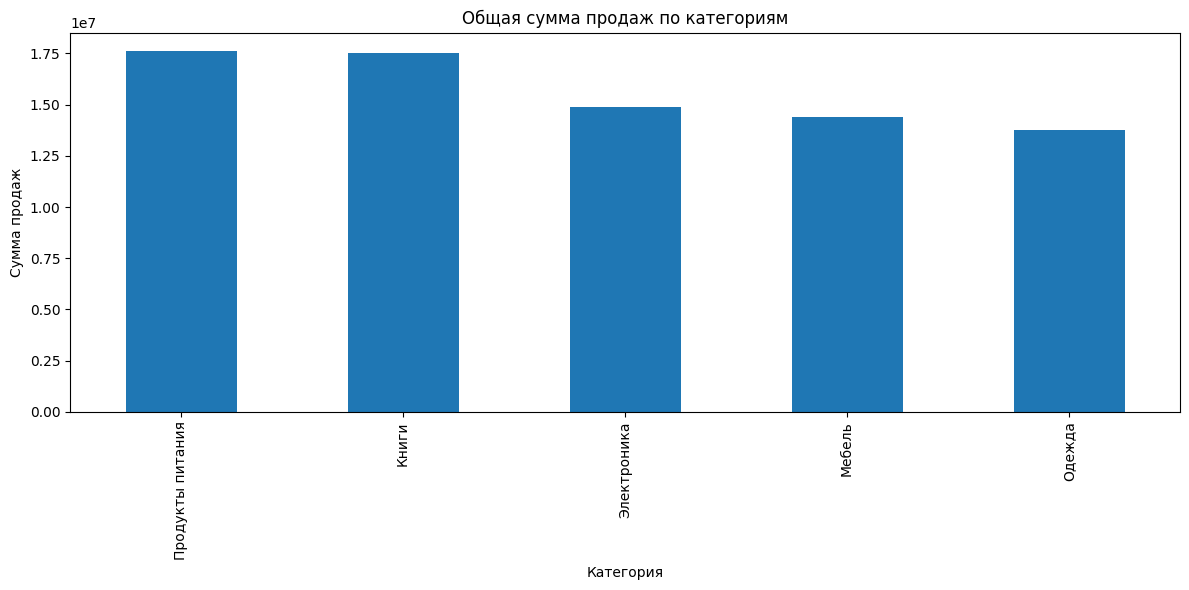

In [ ]:
plt.figure(figsize=(12, 6))
sales_by_category.plot(kind='bar')
plt.title('Общая сумма продаж по категориям')
plt.xlabel('Категория')
plt.ylabel('Сумма продаж')
plt.tight_layout()
plt.savefig('sales_by_category.png')


2. Создайте график средних продаж по годам:

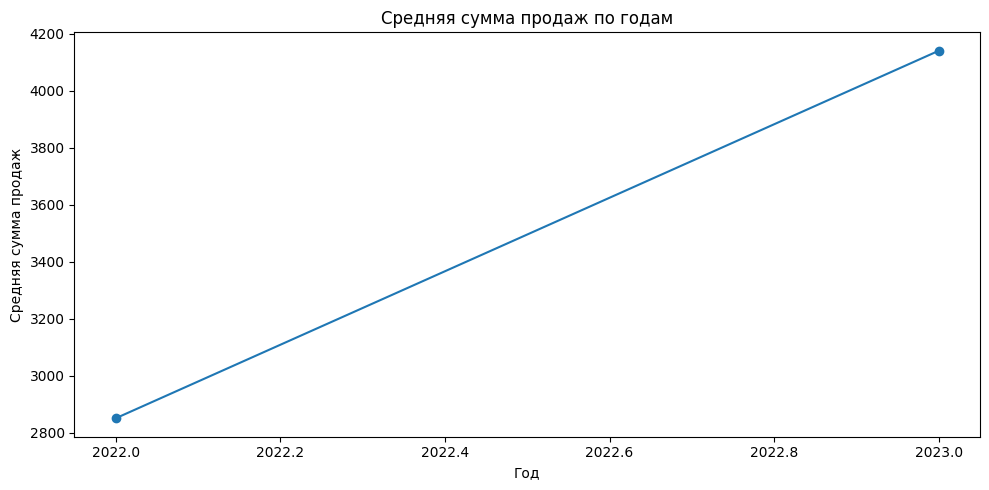

In [ ]:
plt.figure(figsize=(10, 5))
avg_sales_by_year.plot(kind='line', marker='o')
plt.title('Средняя сумма продаж по годам')
plt.xlabel('Год')
plt.ylabel('Средняя сумма продаж')
plt.tight_layout()
plt.savefig('avg_sales_by_year.png')

### Шаг 7: Сохранение консолидированных данных
Сохраните консолидированные данные в CSV-файл:

In [19]:
df_consolidated.to_csv('consolidated_sales_data.csv', index=False)
print("\nКонсолидированные данные сохранены в файл 'consolidated_sales_data.csv'")


Консолидированные данные сохранены в файл 'consolidated_sales_data.csv'
